In [31]:
import pandas as pd
df = pd.read_csv('ST_train.csv')

**HomePlanet imputation**

higher correlation to deck

investigate 'num' correlation

review services correlation

In [32]:
HomePlanet_num_df = df[['HomePlanet', 'Cabin']].copy()
HomePlanet_num_df.shape

(8693, 2)

In [33]:
HomePlanet_num_df = HomePlanet_num_df.dropna()
HomePlanet_num_df.shape

(8299, 2)

In [34]:
HomePlanet_num_df[['deck', 'num', 'side']] = HomePlanet_num_df['Cabin'].str.split('/', expand=True)
HomePlanet_num_df.head()

,HomePlanet,Cabin,deck,num,side
0,Europa,B/0/P,B,0,P
1,Earth,F/0/S,F,0,S
2,Europa,A/0/S,A,0,S
3,Europa,A/0/S,A,0,S
4,Earth,F/1/S,F,1,S


In [35]:
HomePlanet_num_df = HomePlanet_num_df.drop('Cabin', axis=1)
HomePlanet_num_df.head()

,HomePlanet,deck,num,side
0,Europa,B,0,P
1,Earth,F,0,S
2,Europa,A,0,S
3,Europa,A,0,S
4,Earth,F,1,S


In [36]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'deck' and 'side' columns
HomePlanet_num_df['deck_encoded'] = label_encoder.fit_transform(HomePlanet_num_df['deck'])
HomePlanet_num_df['side_encoded'] = label_encoder.fit_transform(HomePlanet_num_df['side'])
HomePlanet_num_df['HomePlanet_encoded'] = label_encoder.fit_transform(HomePlanet_num_df['HomePlanet'])

# Calculate correlation matrix for the encoded and numeric columns
correlation_matrix = HomePlanet_num_df[['num', 'HomePlanet_encoded', 'deck_encoded', 'side_encoded']].corr()

print(correlation_matrix)

                         num  HomePlanet_encoded  deck_encoded  side_encoded
num                 1.000000           -0.203172      0.533102     -0.034872
HomePlanet_encoded -0.203172            1.000000     -0.418904      0.000528
deck_encoded        0.533102           -0.418904      1.000000     -0.033546
side_encoded       -0.034872            0.000528     -0.033546      1.000000


In [37]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

X = HomePlanet_num_df[['deck_encoded', 'side_encoded', 'num']]

# Select the target variable
y = HomePlanet_num_df['HomePlanet_encoded']

# Calculate the MI scores
mi_scores = mutual_info_classif(X, y, discrete_features=True)

# Create a Series to view the mutual information scores with feature names
mi_series = pd.Series(mi_scores, index=X.columns)

print(mi_series)

deck_encoded    0.640803
side_encoded    0.000824
num             0.425031
dtype: float64


In [38]:
HomePlanet_services_df = df[['HomePlanet', 'RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].copy()
HomePlanet_services_df.shape

(8693, 6)

In [39]:
HomePlanet_services_df = HomePlanet_services_df.dropna()
HomePlanet_services_df.shape

(7602, 6)

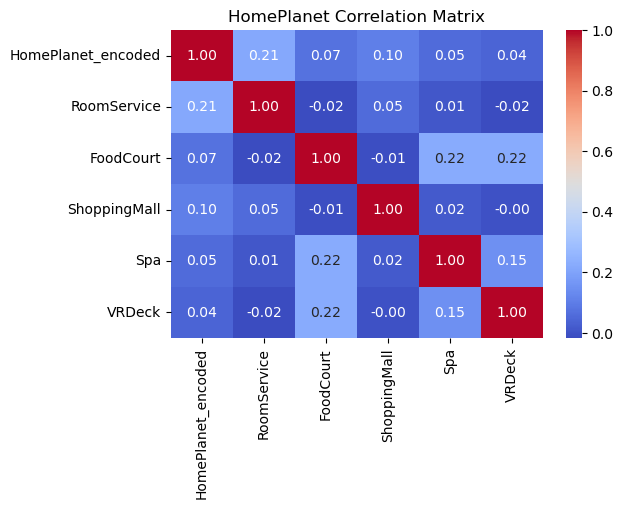

In [40]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'deck' and 'side' columns
HomePlanet_services_df['HomePlanet_encoded'] = label_encoder.fit_transform(HomePlanet_services_df['HomePlanet'])

# Calculate correlation matrix for the encoded and numeric columns
correlation_matrix = HomePlanet_services_df[['HomePlanet_encoded', 'RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

plt.title('HomePlanet Correlation Matrix')
plt.show()

In [41]:
HomePlanet_services_df.head()

,HomePlanet,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_encoded
0,Europa,0.0,0.0,0.0,0.0,0.0,1
1,Earth,109.0,9.0,25.0,549.0,44.0,0
2,Europa,43.0,3576.0,0.0,6715.0,49.0,1
3,Europa,0.0,1283.0,371.0,3329.0,193.0,1
4,Earth,303.0,70.0,151.0,565.0,2.0,0


In [42]:
X = HomePlanet_services_df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]

# Select the target variable
y = HomePlanet_services_df['HomePlanet_encoded']

# Calculate the MI scores
mi_scores = mutual_info_classif(X, y, discrete_features=False)

# Create a Series to view the mutual information scores with feature names
mi_series = pd.Series(mi_scores, index=X.columns)

print(mi_series)

RoomService     0.068046
FoodCourt       0.110602
ShoppingMall    0.053048
Spa             0.048386
VRDeck          0.075282
dtype: float64


Verdict: services not good for prediction, use **deck and num**

********************

**CryoSleep imputation**

If any services used, default to FALSE

if located on A,D,E,F decks, incline to FALSE

**Cabin imputation**

Num correlate to PassengerId (Group) and HomePlanet

Deck correlate to HomePlanet

side no correlations, use Random Sample 

**Destination imputation**

no strong correlations

**Age imputation**

no good correlation, review distribution, if skewed, use median

**VIP imputation**

no good correlation, use Mode

**RoomService,FoodCourt,ShoppingMall,Spa,VRDeck imputation**

use medians

**Name elements imputation**

use Random Sample within boundaries of column values